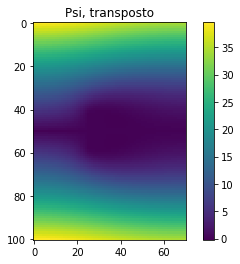

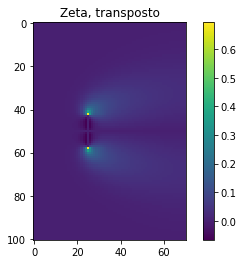

Numero de interações: 11891
Em um configuração bem estável, com w=0.1 e W = 8, é possivel rodar com Re = 20, porém chegando a Re = 25, não é possivel, mesmo se eu aumentar o tamanho da grade para 150,130. Se eu, porém, alterar o tamanho do objeto para, por exemplo, 15,15, consigo rodar Re = 25 até aprox 28, então preciso aumentar o valor da grade de novo, para 200,180, e mais um pouco no tamanho do obj (18,18) conseguindo rodar de 30 a


In [92]:
import numpy as np
import matplotlib.pyplot as plt

ep = 0.0001
h = 1
V0 = 1
Nx,Ny = 70,50 #tamanho da grade
maxdif = 1
w = 0.2
j = 0

p = 25 # posiçao do obj
W,T = 8,8 #tamanho do obj

Re = 10
R = Re/(2*W)

Psi = np.empty([Nx+1,Ny+1])
Psi[:,:] = 0

nPsi = np.copy(Psi)

Xi = np.empty([Nx+1,Ny+1])
Xi[:,:] = 0

dif = np.copy(Xi)

for i in range (0,Ny):
    Psi[:,i] = i+1
Obj[2:5,0:2] = 1

while maxdif > ep:  
    
    nPsi[1:-1,1:-1] = (1/4)*(Psi[2:,1:-1]+Psi[0:-2,1:-1]+Psi[1:-1,2:]+Psi[1:-1,0:-2]-Xi[1:-1,1:-1])

    nPsi[:,0] = 0
    Xi[:,0] = 0

    Xi[0,:] = 0
    nPsi[0,:] = np.copy(Psi[1,:])

    Xi[:,Ny] = 0
    nPsi[:,Ny] = np.copy(Psi[:,Ny-1]) + 1

    nPsi[Nx,:] = np.copy(Psi[Nx-1,:])
    Xi[Nx,:] = Xi[Nx-1,:]

    nPsi[p:p+T,:W] = 0
    Xi[p:p+T,W] = 2*np.copy(Psi[p:p+T,W+1])
    Xi[p,:W] = 2*np.copy(Psi[p-1,:W])
    Xi[p,:W] = 2*np.copy(Psi[p+1,W])

    nPsi = (1 - w)*np.copy(Psi) + w*nPsi
    
    Xi[1:-1,1:-1] = (1/4)*(Xi[2:,1:-1]+Xi[0:-2,1:-1]+Xi[1:-1,2:]+Xi[1:-1,0:-2] - (R/4)*(((nPsi[1:-1,2:]-nPsi[1:-1,:-2])*(Xi[2:,1:-1]-Xi[:-2,1:-1]))-((nPsi[2:,1:-1]-nPsi[0:-2,1:-1])*(Xi[1:-1,2:]-Xi[1:-1,0:-2]))))

    Xi[:,0] = 0

    Xi[0,:] = 0

    Xi[:,Ny] = 0

    Xi[Nx,:] = Xi[Nx-1,:]

    Xi[p:p+T,W] = 2*np.copy(Psi[p:p+T,W+1])
    Xi[p,:W] = 2*np.copy(Psi[p-1,:W])
    Xi[p,:W] = 2*np.copy(Psi[p+1,:W])


    dif[:,:] = np.absolute((Psi - nPsi))
    maxdif = np.amax(dif)
    Psi = np.copy(nPsi)
    j += 1

psif = np.empty([2*Ny+1,Nx+1])
psif[Ny:2*Ny+1,:Nx+1] = np.transpose(Psi)
psif[0:Ny+1,:Nx+1] = np.flipud(np.transpose(Psi))

plt.imshow(psif)
plt.colorbar()
plt.title("Psi, transposto")
plt.show()

Xif = np.empty([2*Ny+1,Nx+1])
Xif[Ny:2*Ny+1,:Nx+1] = np.transpose(Xi)
Xif[0:Ny+1,:Nx+1] = np.flipud(np.transpose(Xi))

plt.imshow(Xif)
plt.colorbar()
plt.title("Zeta, transposto")
plt.show()

print("Numero de interações:",j)
print("Em um configuração bem estável, com w=0.2 e W = 8, é possivel rodar com Re = 20, porém chegando a Re = 25, não é possivel, mesmo se eu aumentar o tamanho da grade para 150,130. Se eu, porém, alterar o tamanho do objeto para, por exemplo, 15,15, consigo rodar Re = 25 até aprox 28, então preciso aumentar o valor da grade de novo, para 200,180, e mais um pouco no tamanho do obj (18,18) conseguindo rodar de 30 a")